In [1]:
import boto3

client = boto3.client('s3') #low-level functional API

resource = boto3.resource('s3') #high-level object-oriented API
my_bucket = resource.Bucket('hara-ds-datascience') #subsitute this for your s3 bucket name. 

In [2]:
client

In [3]:
resource

s3.ServiceResource()

In [4]:
my_bucket

s3.Bucket(name='hara-ds-datascience')

In [5]:
bucket_data = 'hara-ds-datascience'
path_test = 'Robert/image-augmentation/Test/Positive-(1001).jpg'
folder_path = 'Robert/image-augmentation/Train1/'
test_path = 'Robert/image-augmentation/Test/'
name_files = 'negative-(1056).pg'
key = folder_path + name_files
type(bucket_data)

str

In [6]:
from PIL import Image
import numpy as np
IMG_SIZE = 256
#object_2 = client.get_object(Bucket=bucket_data, Key=path_test)
#images = Image.open(object_2['Body'])
#img = images.convert('L')
#img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
#np.array(img)
#print(img)

In [7]:
import matplotlib.pyplot as plt

In [8]:
files = list(my_bucket.objects.filter(Prefix=folder_path))
files.pop(0)
#files

s3.ObjectSummary(bucket_name='hara-ds-datascience', key='Robert/image-augmentation/Train1/')

In [9]:
import os
import numpy as np
#heights = []
#widths = []
#img_count = 0
#for file in files:
#    nama = str(file)
#    nama = nama.split(',')[1].replace("')","").replace("key='","").split("/")[3]
#    object_1 = client.get_object(Bucket=bucket_data, Key=folder_path+nama)
#    images = np.array(Image.open(object_1['Body']))
    #images = Image.open(object_1['Body'])
#    heights.append(images.shape[0])
#    widths.append(images.shape[1])
#    img_count += 1
#avg_height = sum(heights) / len(heights)
#avg_width = sum(widths) / len(widths)
#print(str(avg_width), str(max(widths)), str(min(widths)))
#print(str(avg_height), str(max(heights)), str(min(heights)))

In [10]:
def label_image(name):
    word_label = name.split('-')[0]
    if word_label == 'Positive': return np.array([1,0])
    elif word_label == 'negative': return np.array([0,1])

In [11]:
IMG_SIZE = 256

In [12]:
import numpy as np
from PIL import Image
from random import shuffle
def load_training_data():
    train_data=[]
    for file in files:
        nama = str(file)
        nama = nama.split(',')[1].replace("')","").replace("key='","").split("/")[3]
        label = label_image(nama)
        key = folder_path + nama
        object_1 = client.get_object(Bucket=bucket_data, Key=key)
        img = Image.open(object_1['Body'])
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        train_data.append([np.array(img), label])
    shuffle(train_data)
    return train_data

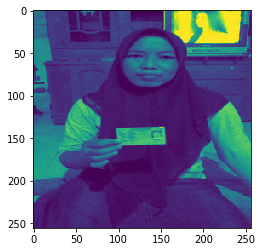

In [13]:
train_data = load_training_data()
plt.imshow(train_data[43][0])

In [14]:
files1 = list(my_bucket.objects.filter(Prefix=test_path))
files1.pop(0)
#files1

s3.ObjectSummary(bucket_name='hara-ds-datascience', key='Robert/image-augmentation/Test/')

In [15]:
def load_test_data():
    test_data = []
    for file in files1:
        nama = str(file)
        nama = nama.split(',')[1].replace("')","").replace("key='","").split("/")[3]
        label = label_image(nama)
        key = test_path + nama
        object_1 = client.get_object(Bucket=bucket_data, Key=key)
        img = Image.open(object_1['Body'])
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), label])
    shuffle(test_data)
    return test_data

In [16]:
test_data1 = load_test_data()

In [55]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])
!pip install keras
!pip install tensorflow

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [57]:
IMG_SIZE = 256
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, batch_size = 50, epochs = 50, verbose = 1)

Epoch 1/50
2560/2560 [==============================] - 446s 174ms/step - loss: 0.6285 - acc: 0.7066
Epoch 2/50
2560/2560 [==============================] - 446s 174ms/step - loss: 0.3603 - acc: 0.8418
Epoch 3/50
2560/2560 [==============================] - 444s 173ms/step - loss: 0.2267 - acc: 0.9082
Epoch 4/50
2560/2560 [==============================] - 445s 174ms/step - loss: 0.1467 - acc: 0.9414
Epoch 5/50
2560/2560 [==============================] - 1143s 446ms/step - loss: 0.0905 - acc: 0.9590
Epoch 6/50
2560/2560 [==============================] - 1506s 588ms/step - loss: 0.0883 - acc: 0.9668
Epoch 7/50
2560/2560 [==============================] - 1501s 586ms/step - loss: 0.0713 - acc: 0.9727
Epoch 8/50
2560/2560 [==============================] - 1506s 588ms/step - loss: 0.0766 - acc: 0.9707
Epoch 9/50
2560/2560 [==============================] - 1509s 590ms/step - loss: 0.0512 - acc: 0.9836
Epoch 10/50
2560/2560 [==============================] - 1509s 590ms/step - loss: 0.11

In [ ]:
testImages = np.array([i[0] for i in test_data1]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
testLabels = np.array([i[1] for i in test_data1])

loss, acc = model.evaluate(testImages, testLabels, verbose = 2)
print(acc * 100)

In [ ]:
predictions = model.predict(testImages)

In [ ]:
from sklearn.metrics import confusion_matrix
image_pred = (predictions > 0.8)
confusion_matrix(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
precision, recall, _ = precision_recall_curve(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
precision_recall_curve(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
roc_auc_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
f1_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
precision_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
recall_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
accuracy_score(testLabels.argmax(axis=1), image_pred.argmax(axis=1))

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("selfie_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("selfie_model-weights.h5")
print("Saved model to disk")
model.save("selfie_model.h5")